DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

1. Data Exploration and Preprocessing:

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('adult_with_headers.csv')  

In [3]:
print(df.head())

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [5]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [7]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'fnlwgt']] = scaler.fit_transform(df[['age', 'fnlwgt']])

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['age', 'fnlwgt']] = scaler.fit_transform(df[['age', 'fnlwgt']])

 * Standard Scaling is useful when the features follow a Normal distribution. It’s also a good choice when we don’t know the distribution of features or when the distribution is not Gaussian (a bell curve). Standard Scaling is less affected by outliers.
 * Min-Max Scaling is a good choice when the data is not normally distributed and the algorithm you’re using does not make assumptions about the distribution of your data, like k-nearest neighbors (KNN) and neural networks. However, it is sensitive to outliers. So if there are outliers in the data, you might want to consider the Robust Scaler.

2. Encoding Techniques:

In [10]:
for col in df.columns:
    if df[col].dtype == 'object':  # if column is categorical
        if len(df[col].unique()) <= 5:  # if column has less than or equal to 5 unique values
            print(df[col].value_counts())
            print("\n")

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64


 Male      21790
 Female    10771
Name: sex, dtype: int64


 <=50K    24720
 >50K      7841
Name: income, dtype: int64




In [11]:
# Import necessary library
import pandas as pd

# Let's assume that 'color' is a categorical feature with less than 5 categories
encoded_features = pd.get_dummies(df['race'])

# To add these new features back into the original dataframe:
df = pd.concat([df, encoded_features], axis=1)
df


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0.301370,State-gov,0.044302,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,0,0,0,1
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0,0,0,1
2,0.287671,Private,0.138113,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0,0,0,1
3,0.493151,Private,0.151068,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0,1,0,0
4,0.150685,Private,0.221488,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.166404,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,0,0,0,1
32557,0.315068,Private,0.096500,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0,0,0,0,1
32558,0.561644,Private,0.094827,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0,0,0,0,1
32559,0.068493,Private,0.128499,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,0,0,0,1


In [12]:
for col in df.columns:
    if df[col].dtype == 'object':  # if column is categorical
        if len(df[col].unique()) > 5:  # if column has more than 5 unique values
            print(df[col].value_counts())
            print("\n")

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64


 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64


 Prof-specialty       4140
 Craft-repair         4099
 Exec-mana

In [13]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Let's assume that 'occupation' is a categorical feature with more than 5 categories
df['marital_status'] = le.fit_transform(df['marital_status'])

One-Hot Encoding:

Pros:

 * No arbitrary ordering: One-Hot Encoding does not impose any arbitrary ordering of categories. This is useful for nominal categorical variables where there is no inherent order in the categories.
 * Suitable for linear models: Linear models can use one-hot encoded variables effectively.
   
Cons:

 * High dimensionality: If the categorical variable has many categories, one-hot encoding can lead to high dimensionality. This can slow down the learning process significantly.
 * Sparse matrix: The one-hot encoded matrix can be very sparse, i.e., consist mostly of zeros. This can be memory inefficient if not handled properly.
   
Label Encoding:

Pros:

 * Efficient representation: Label Encoding represents the data in a more compact format. This can be particularly useful for tree-based models.
 * Handles high cardinality well: If a categorical variable has many categories, Label Encoding will handle this efficiently by assigning each category a unique integer.
   
Cons:

 * Arbitrary ordering: Label Encoding imposes an arbitrary ordering on the categories. This arbitrary order might confuse the model and result in strange results if the categories are nominal (i.e., there is no inherent order in the categories).
 * Not suitable for linear models: If used with linear models, the model might misunderstand the data to be in some kind of order, which can result in a sub-optimal model.

3. Feature Engineering:

1. With Original Features:

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'income' is the target variable
y = df['income']
X = df.drop('income', axis=1)

# Convert categorical variables to numeric for the model
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy with original features: {accuracy}")

Model accuracy with original features: 0.8068478427759865


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
df['marital_status'] = df['marital_status'].astype(str)
df['is_married'] = df['marital_status'].apply(lambda x : 1 if 'Married' in x else 0)

In [16]:
# Create new features
df['is_married'] = df['marital_status'].apply(lambda x : 1 if 'Married' in x else 0)
df['capital_diff'] = df['capital_gain'] - df['capital_loss']

# Assuming 'income' is the target variable
y = df['income']
X = df.drop('income', axis=1)

# Convert categorical variables to numeric for the model
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy with new features: {accuracy}")

Model accuracy with new features: 0.8063872255489022


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
df['is_married'] = df['marital_status'].apply(lambda x : 1 if 'Married' in x else 0)

In [18]:
df['capital_diff'] = df['capital_gain'] - df['capital_loss']

Let’s consider the ‘capital_gain’ and ‘capital_loss’ features in your dataset. These features are likely to be right-skewed because only a few people might have high capital gains or losses, while most people would have low or zero capital gains or losses.

A common way to reduce skewness is to apply a log transformation. However, since the log of zero is undefined, we need to add a small constant to the values before applying the log transformation.

In [19]:
# Import necessary library
import numpy as np

# Apply log transformation to 'capital_gain' and 'capital_loss'
df['log_capital_gain'] = np.log(df['capital_gain'] + 1)
df['log_capital_loss'] = np.log(df['capital_loss'] + 1)

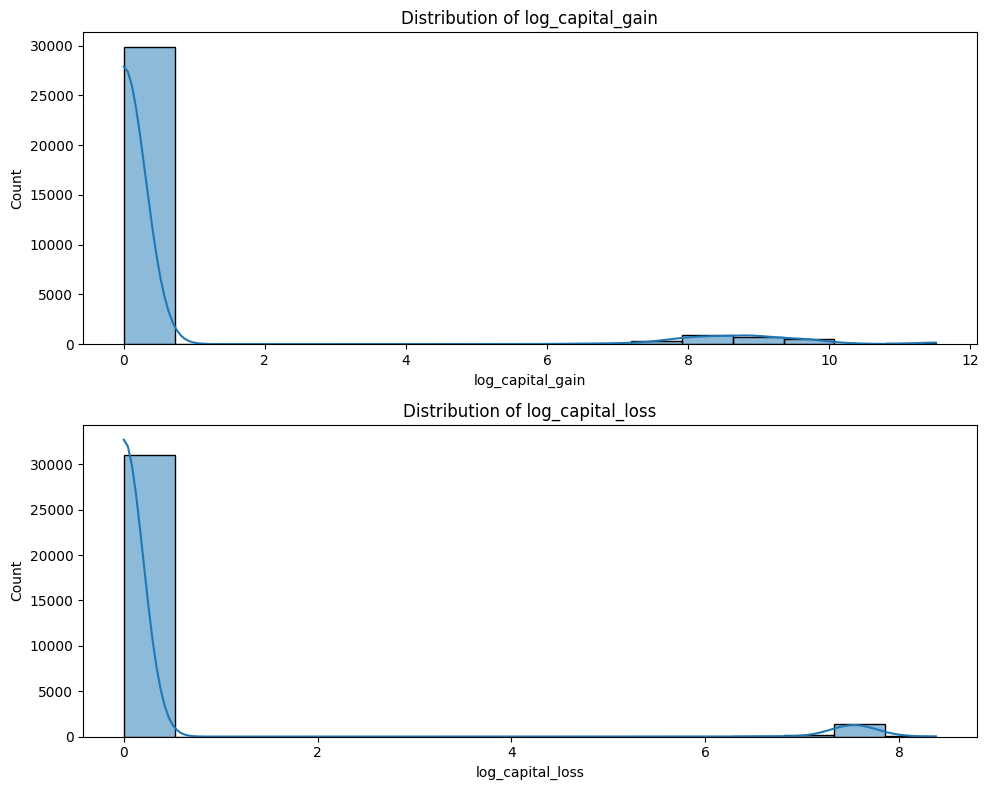

In [20]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axis
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot the distribution of 'log_capital_gain'
sns.histplot(df['log_capital_gain'], kde=True, ax=ax[0])
ax[0].set_title('Distribution of log_capital_gain')

# Plot the distribution of 'log_capital_loss'
sns.histplot(df['log_capital_loss'], kde=True, ax=ax[1])
ax[1].set_title('Distribution of log_capital_loss')

plt.tight_layout()
plt.show()

4. Feature Selection:

In [21]:
from sklearn.ensemble import IsolationForest

# Assuming X is your feature matrix
clf = IsolationForest(contamination=0.01)  # contamination is the expected proportion of outliers in the data
outliers = clf.fit_predict(X)

# The outliers variable will be an array containing -1 for outliers and 1 for inliers
df['outlier'] = outliers
df = df[df['outlier'] == 1]# only keep inliers

Isolation Forest for Outlier Detection:

Isolation Forest is an unsupervised learning algorithm that belongs to the ensemble decision trees family. This algorithm works great with very high dimensional datasets and it proved to be a very effective way of detecting anomalies.

Effect of Outliers on Model Performance:

Outliers can have a significant impact on the performance of machine learning models:

 * Distortion of the model: Outliers can distort the underlying pattern in the data by pulling the fitted model towards themselves, leading to a model that doesn’t generalize well to new data.
 * Impact on performance metrics: Outliers can have a large impact on the calculation of loss functions and performance metrics, leading to misleading results.
 * Impact on assumptions: Many statistical models assume normally distributed residuals. Outliers can violate this assumption and invalidate the results.

Predictive Power Score (PPS):

The PPS is a score that can reveal complex and nonlinear patterns in the data. It’s an alternative to the correlation matrix and can be particularly useful when you want to understand the relationships between different features in your dataset.

In [22]:
!pip install ppscore

In [23]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in df.columns:
    if df[col].dtype == 'object':  # if column is categorical
        df[col] = le.fit_transform(df[col])

C:\Users\DELL\AppData\Local\Temp\ipykernel_23012\3638059359.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_23012\3638059359.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_23012\3638059359.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

<Axes: xlabel='x', ylabel='y'>

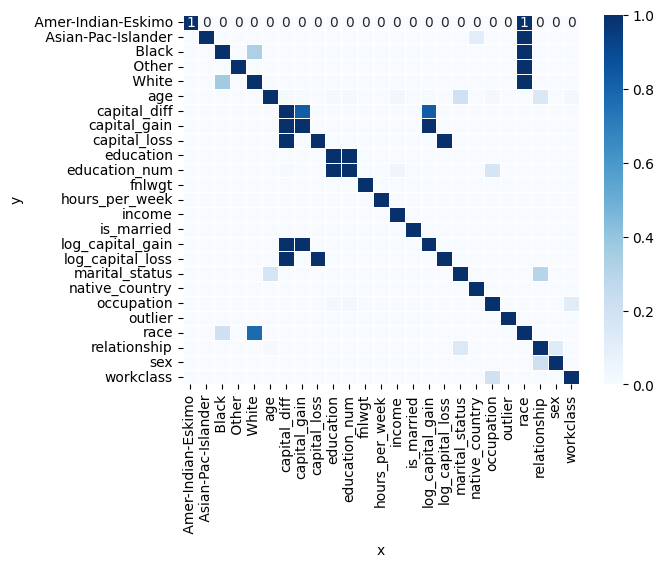

In [27]:
import ppscore as pps
import seaborn as sns

# calculate the whole PPS matrix
pps_matrix = pps.matrix(df)

# Extract just the PPS scores
pps_scores = pps_matrix[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# visualize the matrix
sns.heatmap(pps_scores, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

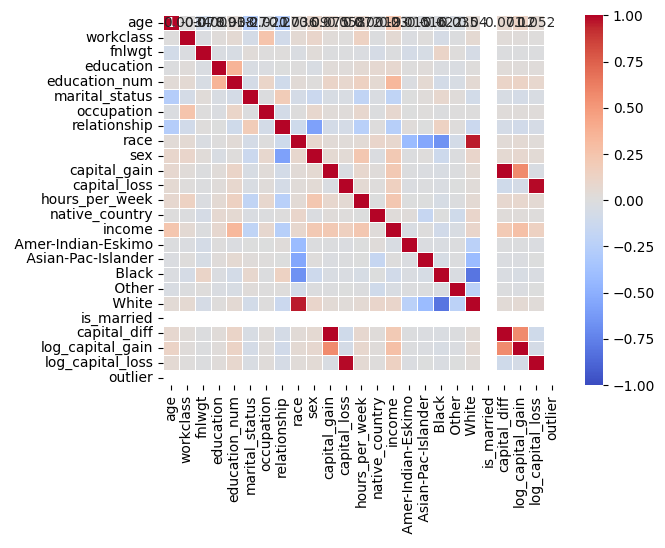

In [28]:
correlation_matrix = df.corr()

# visualize the matrix
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, cmap="coolwarm", linewidths=0.5, annot=True)

Comparison:

While both PPS and correlation matrix can be used to find relationships between features, they have some key differences:

 * Linearity: Correlation measures the linear relationship between two variables, while PPS can capture non-linear relationships.
 * Type of the variables: Correlation requires both variables to be numeric. PPS can find relationships between two categorical variables, or between one categorical and one numeric variable (in any direction).
 * Value range: Correlation ranges from -1 to 1, while PPS ranges from 0 to 1.
Symmetry: Correlation is symmetric (corr(X, Y) = corr(Y, X)), while PPS is not (pps(X, Y) != pps(Y, X)).